# Model

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import joblib

In [4]:
df = pd.read_parquet('../Data/preprocessing_data.parquet')

In [5]:
X = np.array(df['text'].tolist())
y = df['class'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13, stratify=y
)

In [7]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     23190
           1       0.90      0.94      0.92     23206

    accuracy                           0.92     46396
   macro avg       0.92      0.92      0.92     46396
weighted avg       0.92      0.92      0.92     46396



In [8]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     23190
           1       0.94      0.94      0.94     23206

    accuracy                           0.94     46396
   macro avg       0.94      0.94      0.94     46396
weighted avg       0.94      0.94      0.94     46396



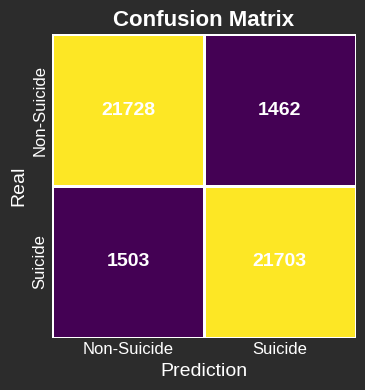

In [12]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4), facecolor='#2c2c2c')

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="viridis",
        xticklabels=["Non-Suicide", "Suicide"],
        yticklabels=["Non-Suicide", "Suicide"],
        cbar=False,
        linewidths=1,
        linecolor='white',
        square=True,
        ax=ax,
        annot_kws={"size": 14, "color": "white", "weight": "bold"}
    )

    ax.set_facecolor('#2c2c2c')
    ax.tick_params(colors='white', labelsize=12)
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')

    plt.xlabel("Prediction", fontsize=14, color='white')
    plt.ylabel("Real", fontsize=14, color='white')
    plt.title("Confusion Matrix", fontsize=16, color='white', weight='bold')
    plt.tight_layout()
    plt.savefig("../Outputs/Images/confusion_matrix")
    plt.show()

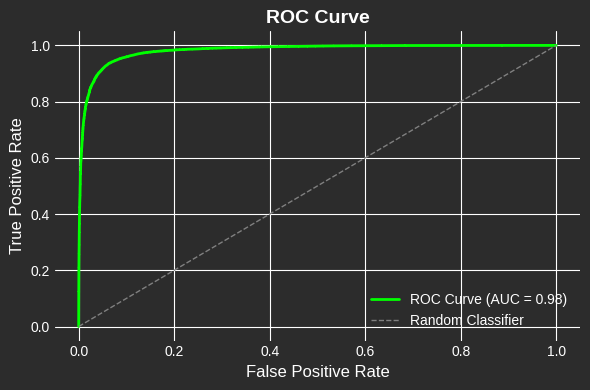

In [15]:
y_proba = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

with plt.style.context('seaborn-v0_8-darkgrid'):
    fig, ax = plt.subplots(figsize=(6, 4), facecolor='#2c2c2c')

    ax.plot(fpr, tpr, color='lime', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

    ax.set_facecolor('#2c2c2c')
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.title.set_color('white')
    ax.legend(facecolor='#2c2c2c', edgecolor='white', labelcolor='white')

    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("ROC Curve", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.savefig("../Outputs/Images/roc_curve")
    plt.show()

In [18]:
joblib.dump(xgb, '../Outputs/Models/suicide_detection_model.pkl')

['../Outputs/Models/suicide_detection_model.pkl']